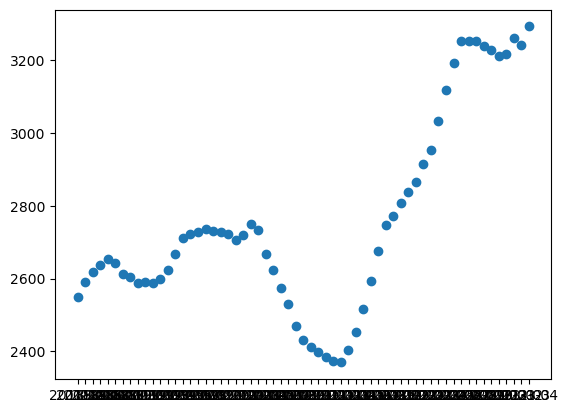

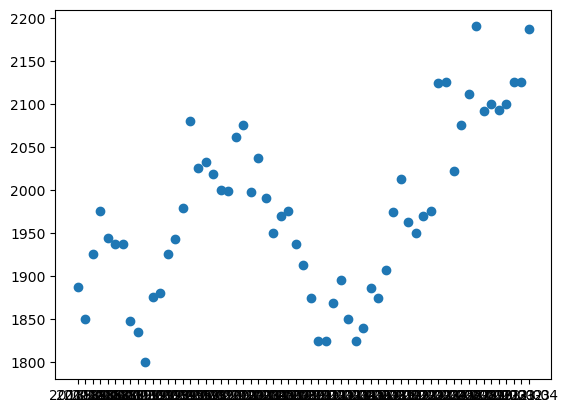

In [5]:
"""
DO NOT RUN

'Data Observation' was used to test data and help visual data to determine best ways to display/interpret the data.
"""

"""
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import math

#Takes in a sorted list and returns the median of the list
def MedianCalc(dataList):
    count = 0
    if (len(dataList)%2) == 0:
        even = True
    else:
        even = False
    for i in dataList:
        count+=1
        if even:
            if count == (len(dataList)/2):
                median = (dataList[count-2] + i) / 2
        else:
            if count-(len(dataList)/2) > 0 and count-(len(dataList)/2) < 1:
                median = i
    return median

#Takes in a sorted list for a parameter and returns the median and mean of the list
def MedianMeanCalc(dataList):
    count = 0
    mean = 0
    if (len(dataList)%2) == 0:
        even = True
    else:
        even = False
    for i in dataList:
        count+=1
        if even:
            if count == (len(dataList)/2):
                median = (dataList[count-2] + i) / 2
        else:
            if count-(len(dataList)/2) > 0 and count-(len(dataList)/2) < 1:
                median = i
        mean += float(i)
    mean = mean/len(dataList)
    return median, mean

FCount = []
total = 0
#Getting "number of missing data" from each neighborhood
with open("medianAskingRentStreetEasy.csv") as medRent:
    StreetMedRent = csv.reader(medRent, delimiter=',')
    countMain = 0
    for line in StreetMedRent:
        count = 0
        failcount = 0
        for word in line:
            if count <= 2 or count >= 102: #Relevant Data range
                if word == '':
                    failcount += 1
                if countMain <= 5: #Irrelevant data
                    break
            count += 1
        if countMain <= 5:
            countMain += 1
        else:
            FCount.append(failcount)
            countMain += 1

#Getting the number of occurances for each "number of missing data" i.e. how many neighborhoods were missing 0 points, 1 point, 2 points, etc.
NumNeigh = {}
FCount = tuple(FCount)
for i in FCount:
    if i in NumNeigh:
        NumNeigh[i] += 1
    else:
        NumNeigh[i] = 1

#Converting to lists and sorting the data
Keys = []        
for i in NumNeigh.keys():
    Keys.append(i)
Keys = sorted(Keys)
for i in Keys:
    total += NumNeigh[i]
    for j in NumNeigh.values():
        if NumNeigh[i] == j:
            Values.append(j)
            break

#Grouping data points into groups of 3 from least missing points to most for easier comparison
bins = {}
count = 0
for i in Keys:
    if count > 2:
        count = 0
    if count == 0:
        bins[i] = NumNeigh[i]
        start = i
        count+=1
    else:
        bins[start] += NumNeigh[i]
        count += 1

#Determining the percentage of data utilized by excluding data points with high amounts of missing data and displaying data in bar graph
print(bins)
lowTotal = bins[0] + bins[3] + bins[9] + bins[14] + bins[17]
print('Data Represented: ' + str(lowTotal / (total-bins[60])))
print('Max Missing Data: ' + str(24/61))
lowTotal = bins[0] + bins[3] + bins[9] + bins[14]
print('\nData Represented: ' + str(lowTotal / (total-bins[60])))
print('Max Missing Data: ' + str(16/61))
lowTotal = bins[0] + bins[3] + bins[9]
print('\nData Represented: ' + str(lowTotal / (total-bins[60])))
print('Max Missing Data: ' + str(11/61))
lowTotal = bins[0] + bins[3] #Chose this point as it contains 75% of the data and keeps missing data below 15%
print('\n7:')
print('Data Represented: ' + str(lowTotal / (total-bins[60])))
print('Max Missing Data: ' + str(7/61))
lowTotal = bins[0]
print('\nData Represented: ' + str(lowTotal / (total-bins[60])))
print('Max Missing Data: ' + str(2/61))          
FNeigh = plt.figure()
plt.bar(bins.keys(), bins.values())
plt.xlabel('Total missing numbers')
plt.ylabel('Number of occurances')
plt.show()

#Reads income/rent data to a dictionary and separates points with positive or negative rent difference
tDataDict = {}
nBelow = []
nAbove = []
with open('NYCIncomeRentData.csv') as totalData:
    tData = csv.reader(totalData, delimiter=',')
    first = True
    for line in tData:
        neighbor = line[0]
        tDataDict[neighbor] = line[1:]
        if first:
            first = False
            continue
        if float(line[-1]) > 0:
            nAbove.append(line[-1])
        else:
            nBelow.append(line[-1]) 

#Determining and printing the mean and median amounts by which the rents exceeded the 30% income threshold
count = 0
meanAbove = 0
nAbove.sort()
nBelow.sort(reverse=True)
medianAbove, meanAbove = MedianMeanCalc(nAbove)
medianBelow, meanBelow = MedianMeanCalc(nBelow)
print('Mean above 30: %s\nMedian above 30: %s' %(meanAbove, medianAbove))
print('Mean below 30: %s\nMedian below 30: %s' %(meanBelow, medianBelow))     

#Getting the percentage of actual rent being paid in respect to income
RentPercent = []
for key in tDataDict:
    keyList = tDataDict[key]
    if keyList[0] == 'Median Income' or keyList[-1] == 'Actual Rent vs. 30% Income Rent':
        continue
    Inc, Rent = float(keyList[0]), float(keyList[4])
    RentPercent.append((Rent / (Inc/12)) * 100)
RentPercentS = RentPercent.copy()
RentPercentS.sort()
medARent, meanARent = MedianMeanCalc(RentPercentS)
print(medARent)

#Plotting income along x, and rent costs for y
mIncome = []
rDiff = []
incomeList = []
for key in tDataDict:
    keyList = tDataDict[key]
    if keyList[0] == 'Median Income' or keyList[-1] == 'Actual Rent vs. 30% Income Rent':
        continue
    mIncome.append(keyList[0])
    rDiff.append(keyList[-1])
mIncome.sort()
IncomeData = plt.figure()
for i in range(len(mIncome)):
    mIncome[i] = float(mIncome[i])
for i in range(len(rDiff)):
    rDiff[i] = float(rDiff[i])
incomeList = mIncome[:]
mIncome = np.array(mIncome)
RentPercent = np.array(RentPercent)
a, b = np.polyfit(mIncome,RentPercent, 1)
plt.scatter(mIncome, RentPercent)
plt.plot(mIncome, (a*RentPercent + b))
plt.plot(mIncome, (0*RentPercent + 30))
plt.xlabel('Median Income')
plt.ylabel('Actual Rent Percent')
plt.title('Median Income vs. Actual Rent Percent')
plt.show()

#Calculating a middle class and the percentage rent takes up for the upper and lower bounds of the middle class
first = True
totalMedian, totalMean = MedianMeanCalc(incomeList)
midclassL = totalMedian * (2/3)
midclassH = totalMedian * 2
print("Upper Bound of Middle Class: " + str(midclassH))
print("Lower Bound of Middle Class: " + str(midclassL))
for key in tDataDict:
    keyList = tDataDict[key]
    if first:
        keyList.append("Middle Class Lower \%")
        keyList.append("Middle Class Higher \%")
        first = False
        continue
    keyList.append(float(keyList[4]) / (midclassL/12))
    keyList.append(float(keyList[4]) / (midclassH/12))

#Calculating percentiles and rent %s for those percentiles then plotting them in a scatter plot
first = True
rentPer = []
percentiles = []
for key in tDataDict:
    if first:
        first = False
        continue
    rate = 0.0
    for i in range(10):
        rate += .2
        rentL = tDataDict[key][4]
        currPercent = totalMedian*rate
        rentPer.append(float(rentL)/currPercent)
        percentiles.append(rate)
rentPer = np.array(rentPer)
percentiles = np.array(percentiles)
uniques = []
for i in percentiles:
    if i not in uniques:
        uniques.append(i)
a, b = np.polyfit(percentiles,rentPer, 1)
print(a, b)
plt.scatter(percentiles, rentPer)
#plt.plot(percentiles, (a*rentPer + b))
plt.xlabel('Income Percentiles')
plt.ylabel('Rent Percent')
plt.title('Income Percentiles vs. Rent Percent')
plt.xticks(uniques)
plt.show()        

#Checking and comparing mean/median vs income graphs to decide which is better to use
newMData = pd.read_csv('newMedianAskingRent.csv')
colAvg = []
beforeData = True
RentMedList = []
colNames = []
Tcount = -1 
first = True
for i in newMData.columns:
    if i == '2018-04':
        beforeData = False
    if beforeData:
        continue
    colNames.append(i)
    tempList = []
    for num in newMData[i]:
        tempList.append(num)
    RentMedList.append(MedianCalc(tempList))
for col in colNames:
    Tcount+=1
    colAvg.append(0)
    countAvg = 0
    for num in newMData[col]:
        if math.isnan(num):
            continue
        countAvg+=1
        colAvg[Tcount] += num
    colAvg[Tcount] = colAvg[Tcount] / countAvg
csvCovidDict = {'Year-Month': colNames, 'Average Rent': colAvg}
plt.scatter(csvCovidDict['Year-Month'], csvCovidDict['Average Rent'])#Decided on the mean vs income graph
plt.show()
plt.scatter(csvCovidDict['Year-Month'], RentMedList)
plt.show()
"""